In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load the Data and Overview

In [4]:
df=pd.read_csv('multiple_choice/train.csv')

In [5]:
display(df)

,idx,text,choice1,choice2,choice3,choice4,choice5,choice6,label
0,0,"The Rhodesian Bush War was the result , begin...",fought,contended,defended,opposed,NaN,NaN,choice1
1,1,"<ArrayOfQuery xmlns: xsi=""http://www.w3.org/20...",instance,case,illustration,example,NaN,NaN,choice1
2,2,<! -- Beginning of the Coveo Searchbox [BLANK]...,segment,incision,section,subdivision,NaN,NaN,choice3
3,3,"<div class=""CoveoFacet"" data-title=""Salesforce...",Level,Leg,Degree,Stage,NaN,NaN,choice4
4,4,The Sitecore Security Provider ABC has encount...,year,course,class,family,NaN,NaN,choice3
...,...,...,...,...,...,...,...,...,...
115522,115522,Unzip the procdump.exe from the zip file and p...,Change,Transformation,Shift,Fault,NaN,NaN,choice3
115523,115523,"-\nDocument URL\n When available, the URL of t...",capacity,substance,message,content,NaN,NaN,choice4
115524,115524,"1.\n In the upper-right [BLANK], click UI View...",recess,recession,corner,tree,NaN,NaN,choice3
115525,115525,Configuring a Microsoft Exchange Security Prov...,Style,Championship,Title,Claim,NaN,NaN,choice3


### Check Data Types and Missing Values:

In [6]:
# 1. Examine Data Types
print("Data Types:")
print(df.dtypes)
print()

# 2. Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())
print()

# Handling Missing Values (Example: Imputation)

# Count the most frequent choice for each row
most_frequent_choice = df[['choice1', 'choice2', 'choice3', 'choice4', 'choice5', 'choice6']].mode(axis=1, dropna=True)

# Update missing values with the most frequent choice for each row
df[['choice1', 'choice2', 'choice3', 'choice4', 'choice5', 'choice6']] = df[['choice1', 'choice2', 'choice3', 'choice4', 'choice5', 'choice6']].fillna(most_frequent_choice[0], axis=0)

# Verify if missing values have been imputed
print("Missing Values after Imputation:")
print(df.isnull().sum())

Data Types:
idx         int64
text       object
choice1    object
choice2    object
choice3    object
choice4    object
choice5    object
choice6    object
label      object
dtype: object

Missing Values:
idx             0
text            0
choice1         0
choice2         0
choice3         0
choice4         0
choice5    111553
choice6    114463
label           0
dtype: int64

Missing Values after Imputation:
idx             0
text            0
choice1         0
choice2         0
choice3         0
choice4         0
choice5    111553
choice6    114463
label           0
dtype: int64


df

### Statistical Summary

In [9]:
# 1. Statistical Summary for choice Columns
numeric_columns = df[['choice1', 'choice2', 'choice3', 'choice4', 'choice5', 'choice6']]
print("Statistical Summary for Numerical Columns:")
print(numeric_columns.describe())
print('_'*20)

# 2. Summary Statistics for Labels (Class Distribution)
label_counts = df['label'].value_counts()
label_percentages = df['label'].value_counts(normalize=True)

print("Summary Statistics for Labels (Class Distribution):")
print("Class Counts:")
print(label_counts)
print('_'*20)

print("Class Percentages:")
print(label_percentages)


Statistical Summary for Numerical Columns:
       choice1 choice2   choice3 choice4 choice5 choice6
count   115527  115527    115527  115527    3974    1064
unique    9288    9248      8954    9160    1783     718
top      issue   issue  Question   issue    part   issue
freq       634     621      1078     591      34      13
____________________
Summary Statistics for Labels (Class Distribution):
Class Counts:
label
choice3    57657
choice1    25441
choice2    19334
choice4    12871
choice5      159
choice6       65
Name: count, dtype: int64
____________________
Class Percentages:
label
choice3    0.499078
choice1    0.220217
choice2    0.167355
choice4    0.111411
choice5    0.001376
choice6    0.000563
Name: proportion, dtype: float64


### Distribution of Labels

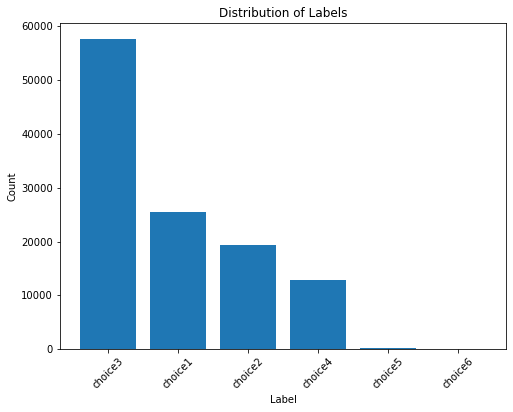

Class Percentages:
label
choice3    0.499078
choice1    0.220217
choice2    0.167355
choice4    0.111411
choice5    0.001376
choice6    0.000563
Name: proportion, dtype: float64


In [12]:
# 1. Plot the Distribution of Labels
plt.figure(figsize=(8, 6))
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)
plt.show()


label_percentages = df['label'].value_counts(normalize=True)
print("Class Percentages:")
print(label_percentages)


### Word/Token Frequency

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohamedmouine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


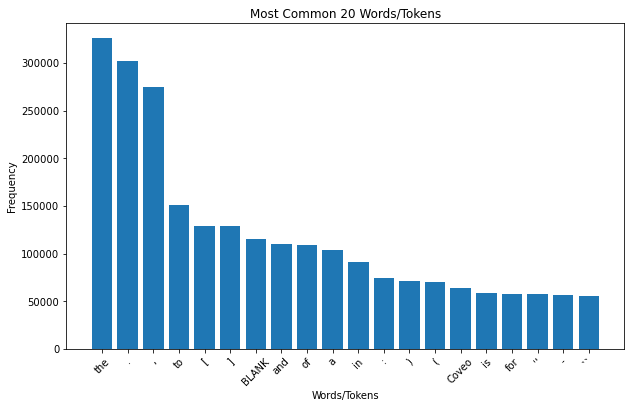

In [14]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')  # Download the punkt tokenizer data (if not already downloaded)



# Tokenize the text column
df['tokens'] = df['text'].apply(word_tokenize)

# Flatten the list of tokens into a single list
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Create a frequency distribution of tokens
fdist = FreqDist(all_tokens)

# 1. Plot the Most Common Words/Tokens
num_most_common = 20  # Number of most common tokens to display in the plot
most_common_tokens = fdist.most_common(num_most_common)
most_common_words, word_counts = zip(*most_common_tokens)

plt.figure(figsize=(10, 6))
plt.bar(most_common_words, word_counts)
plt.xlabel('Words/Tokens')
plt.ylabel('Frequency')
plt.title(f'Most Common {num_most_common} Words/Tokens')
plt.xticks(rotation=45)
plt.show()


### Sentence Length Analysis

In [15]:

# Calculate the sentence length in words
df['sentence_length_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate the sentence length in characters
df['sentence_length_characters'] = df['text'].apply(lambda x: len(x))

# Determine the maximum and minimum sentence lengths
max_length_words = df['sentence_length_words'].max()
min_length_words = df['sentence_length_words'].min()

max_length_characters = df['sentence_length_characters'].max()
min_length_characters = df['sentence_length_characters'].min()

print("Sentence Length Analysis:")
print(f"Maximum Sentence Length (in words): {max_length_words}")
print(f"Minimum Sentence Length (in words): {min_length_words}")
print(f"Maximum Sentence Length (in characters): {max_length_characters}")
print(f"Minimum Sentence Length (in characters): {min_length_characters}")


Sentence Length Analysis:
Maximum Sentence Length (in words): 1168
Minimum Sentence Length (in words): 3
Maximum Sentence Length (in characters): 8424
Minimum Sentence Length (in characters): 7


### Language detection

In [20]:
from langdetect import detect


# Function to perform language identification
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language identification to the 'text' column
df['detected_language'] = df['text'].apply(detect_language)

print(df[['text', 'detected_language']])


                                                     text detected_language
0        The Rhodesian Bush War was the result , begin...                en
1       <ArrayOfQuery xmlns: xsi="http://www.w3.org/20...                ca
2       <! -- Beginning of the Coveo Searchbox [BLANK]...                en
3       <div class="CoveoFacet" data-title="Salesforce...                en
4       The Sitecore Security Provider ABC has encount...                en
...                                                   ...               ...
115522  Unzip the procdump.exe from the zip file and p...                en
115523  -\nDocument URL\n When available, the URL of t...                en
115524  1.\n In the upper-right [BLANK], click UI View...                en
115525  Configuring a Microsoft Exchange Security Prov...                en
115526  The markup of the default Insight Panel looks ...                en

[115527 rows x 2 columns]


In [22]:
df['detected_language'].unique()


array(['en', 'ca', 'fr', 'it', 'ro', 'lv', 'af', 'de', 'da', 'hr', 'nl',
       'vi', 'es', 'et', 'no', 'hu', 'id', 'pt', 'sv', 'sq', 'so', 'tr',
       'tl', 'cy', 'cs', 'fi', 'lt', 'pl'], dtype=object)